In [ ]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
housing_data=fetch_california_housing()

In [ ]:
dataset=pd.DataFrame(housing_data.data, columns=housing_data.feature_names)

In [ ]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
housing_data.target.shape

(20640,)

In [ ]:
dataset['price']=housing_data.target

In [ ]:
X=dataset.iloc[:,:-1]  #independent features
y=dataset.iloc[:,-1]  #dependent features

In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
y.head()

,price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


###Linear Regression

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
line_reg=LinearRegression()
mse=cross_val_score(line_reg, X, y, scoring='neg_mean_squared_error', cv=5)
mse_mean=np.mean(mse)
print(mse_mean)

-0.5582901717686546


###Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[10e-15, 10e-10, 10e-8, 10e-5, 10e-3, 10e-1, 10, 15, 20 , 25, 30, 35, 40, 50 ,60, 70 , 72, 73, 75, 80, 100, 120, 140, 150, 200, 1000]}
ridge_regressor=GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X, y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 70}
-0.5579296039596864


lasso works well when  there are multiple features, just because ridge is having lower score doesn't mean it is better.... ridge however provides a more genralised model... it completely ignores certain features.

ridge is always more stable with correlated data. because
Ridge: give both moderate weight
Lasso: drop one to zero, boost the other


###Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[10e-15, 10e-13, 10e-10, 10e-8, 10e-5, 10e-4, 10e-3,10e-2, 10e-1, 10, 15, 20, 25, 30, 35, 40, 45, 50, 70, 80, 90, 100, 1000]}
lasso_regressor=GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
-0.558275929386899


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

In [ ]:
line_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
prediction_linear=line_reg.predict(X_test)

In [ ]:
import seaborn as sns

/tmp/ipython-input-2192817043.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_linear)


<Axes: xlabel='price', ylabel='Density'>

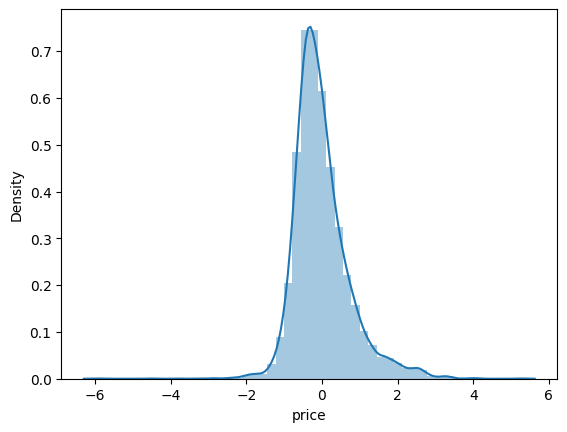

In [ ]:
sns.distplot(y_test-prediction_linear)

/tmp/ipython-input-1028230056.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_lasso)


<Axes: xlabel='price', ylabel='Density'>

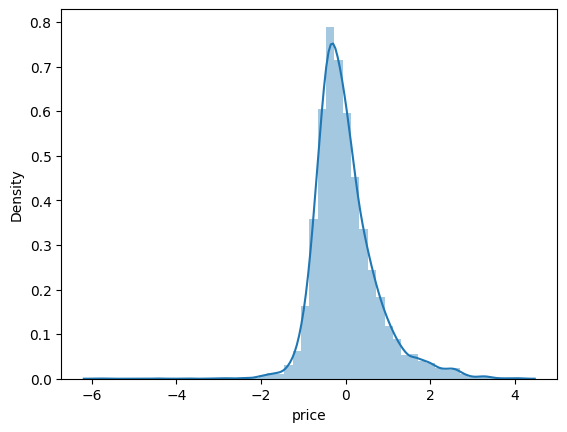

In [ ]:
sns.distplot(y_test-prediction_lasso)

/tmp/ipython-input-1693200975.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_ridge)


<Axes: xlabel='price', ylabel='Density'>

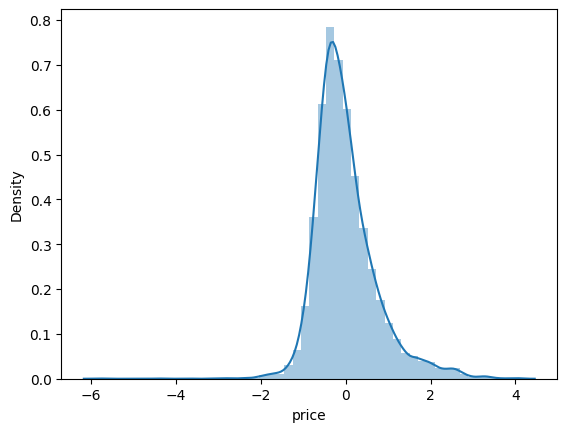

In [ ]:
sns.distplot(y_test-prediction_ridge)

###Performance Metrics

Higher R² = better

Lower MSE & MAE = better

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("------Linear Regression------")
print(r2_score(y_test, prediction_linear))
print(mean_absolute_error(y_test, prediction_linear))
print(mean_squared_error(y_test, prediction_linear))

print("------Ridge Regression-------")
print(r2_score(y_test, prediction_ridge))
print(mean_absolute_error(y_test, prediction_ridge))
print(mean_squared_error(y_test, prediction_ridge))

print("------Lasso Regression------")
print(r2_score(y_test, prediction_lasso))
print(mean_absolute_error(y_test, prediction_lasso))
print(mean_squared_error(y_test, prediction_lasso))


------Linear Regression------
0.5926087785518774
0.5361818140641839
0.5431489670037241
------Ridge Regression-------
0.5952870929118419
0.5359594542012937
0.5395781397464382
------Lasso Regression------
0.5954311672054367
0.535727842901384
0.5393860545967888


Analysis — What do these numbers tell us?
Linear Regression performs the worst

All three metrics show Linear is slightly behind

Indicates overfitting + unstable coefficients

 Ridge & Lasso perform almost equally

Slightly better accuracy (higher R²)

Slightly lower errors (MSE, MAE)

Meaning: regularization worked

Lasso is just a tiny bit better

Best R²

Lowest MSE & MAE

And it gives feature selection advantage

But difference is very small, so practically…

Ridge OR Lasso — both are better, more reliable upgrades over Linear Regression.

###Coefficient Shrinkage Plot

In [ ]:
coefs_linear=line_reg.coef_
coefs_ridge=ridge_regressor.best_estimator_.coef_
coefs_lasso=lasso_regressor.best_estimator_.coef_

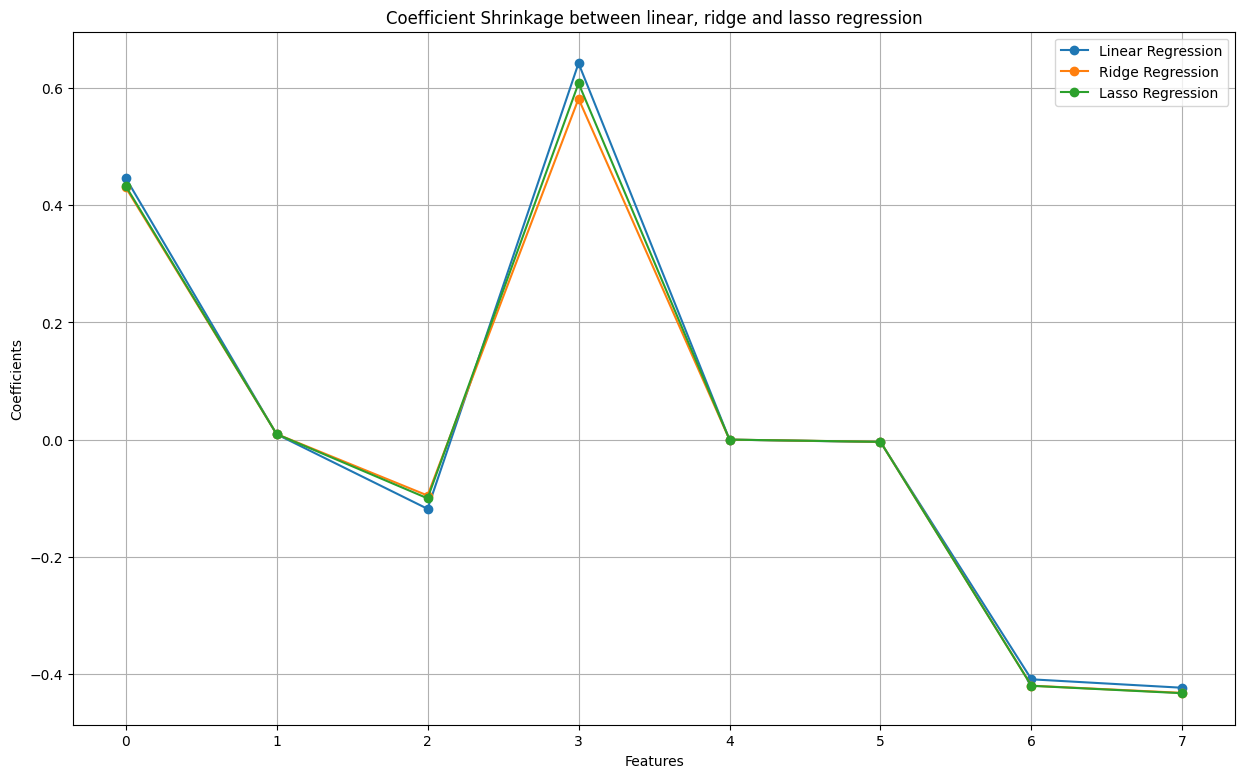

In [ ]:
plt.figure(figsize=(15,9))
plt.plot(coefs_linear, 'o-', label="Linear Regression")
plt.plot(coefs_ridge, 'o-', label='Ridge Regression')
plt.plot(coefs_lasso, 'o-', label='Lasso Regression')
plt.title("Coefficient Shrinkage between linear, ridge and lasso regression")
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.legend()
plt.grid(True)

###Which features did lasso remove?

In [ ]:
features=X.columns
lasso_coefs=pd.Series(coefs_lasso, index=features)

removed_features=lasso_coefs[lasso_coefs==0]
existing_features=lasso_coefs[lasso_coefs!=0]

print("Removed Features:")
print(removed_features)
print("Existing Features:")
print(existing_features)

Removed Features:
Series([], dtype: float64)
Existing Features:
MedInc        0.433009
HouseAge      0.009504
AveRooms     -0.100224
AveBedrms     0.607991
Population   -0.000004
AveOccup     -0.003771
Latitude     -0.420103
Longitude    -0.432734
dtype: float64


Removed Features: None

(Every feature’s coefficient ≠ 0)


All 8 input features contribute something  
No feature is purely noise  
Dataset is already clean + informative  
Correlation between features isn’t high enough to force elimination  

Lasso tried to do feature selection,
but the data didn’t need pruning.